### Программный код для проекта по Математической теории финансов. 

В рамках данного раздела проекта будут проверены модели, которые были сформулированы в предыдущем разделе. 

#### Подготовительный этап - подготовка данных.

В рамках данного пункта будут сделаны необходимые подготовительные процессы для проведения исследования и подготовки к моделированию и проверки гипотез. 

Первым этапом будет загрузка библиотек Python. 

In [1]:
import pandas as pd
import numpy as np
import warnings
## Построение моделей
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

После импорта необходимых библиотек, загрузим данные в Jupiter. Также предварительно были изменены названия столбцов в более краткой форме. 

Также в изначальных данных информация о ВВП Сирии за последние три года была недоступна в силу политических обстоятельств в стране. Заполним эти данные в соответсвии с информацией, которые дает Международный валютный фонд о росте ВВП в стране. Так МВФ говорит, что ВВП в Сирии в среднем растет на 2% в год. 

In [41]:
df = pd.read_excel("C:/Users/Andrew/DataProject.xlsx")

In [3]:
df.head()

,Year,IranGDP,RussiaGDP,VenGDP,SyrGDP,Oil_price,EU_gas_price,US_gas_price,Barl_Price,Trade_sanc,War_sanc,Warcoop_sanc,Fin_sanc,Tour_sanc,Other_sanc,Total_sanctions
0,1980,95.85,940.4,69.84,13.06,37.89,137.6,51.80,441.36,33,16,15,43,5,16,128
1,1981,101.48,906.3,78.37,16.76,36.68,150.0,64.65,395.44,35,15,14,46,9,17,136
2,1982,125.80,959.9,80.00,17.53,33.42,145.1,80.36,338.52,41,20,12,53,15,21,162
3,1983,156.93,993.1,79.67,18.67,29.55,132.0,84.51,354.40,37,18,11,50,17,21,154
4,1984,161.72,938.3,57.83,19.20,28.28,122.6,86.54,355.00,35,18,9,46,14,20,142


Данные были успешно загружены. Далее рассмотрим модели, которые были описаны в предыдущем разделе. Всего их 12. 

1.Влияние различных видов санкций на цены на пшеницу.

2.Влияние различных видов санкций на цены на природный газ в Европейском союзе.

3.Влияние различных видов санкций на цены на природный газ в США.

4.Влияние различных видов санкций на цены на нефть марки Brent.

5.Влияние различных видов санкций на ВВП Ирана.

6.Влияние различных видов санкций на ВВП Сирии.

7.Влияние различных видов санкций на ВВП Венесуэлы.

8.Влияние различных видов санкций на ВВП Российской Федерации.

9.Комплексное влияние цен на биржевые товары на ВВП Сирии.

10.Комплексное влияние цен на биржевые товары на ВВП Ирана.

11.Комплексное влияние цен на биржевые товары на ВВП Венесуэлы.

12.Комплексное влияние цен на биржевые товары на ВВП Российской Федерации.

Для каждой из моделей создадим необходимый датасет, который будет содержать только необходимую информацию для анализа.


In [4]:
df1 = df[["Barl_Price", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df2 = df[["EU_gas_price", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df3 = df[["US_gas_price", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df4 = df[["Oil_price", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df5 = df[["IranGDP", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df6 = df[["SyrGDP", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df7 = df[["VenGDP", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df8 = df[["RussiaGDP", "Trade_sanc", "War_sanc" , "Warcoop_sanc", "Fin_sanc","Tour_sanc","Other_sanc"]]
df9 = df[["IranGDP","Oil_price","EU_gas_price","US_gas_price","Barl_Price"]]
df10 = df[["SyrGDP","Oil_price","EU_gas_price","US_gas_price","Barl_Price"]]
df11 = df[["VenGDP","Oil_price","EU_gas_price","US_gas_price","Barl_Price"]]
df12 = df[["RussiaGDP","Oil_price","EU_gas_price","US_gas_price","Barl_Price"]]

После загрузки моделей в отдельные датасеты, проведем первичный анализ данных моделей на графиках Pairplot из библиотеки seaborn. Такой анализ позволит оценить как наличие связи, так и форму связи.

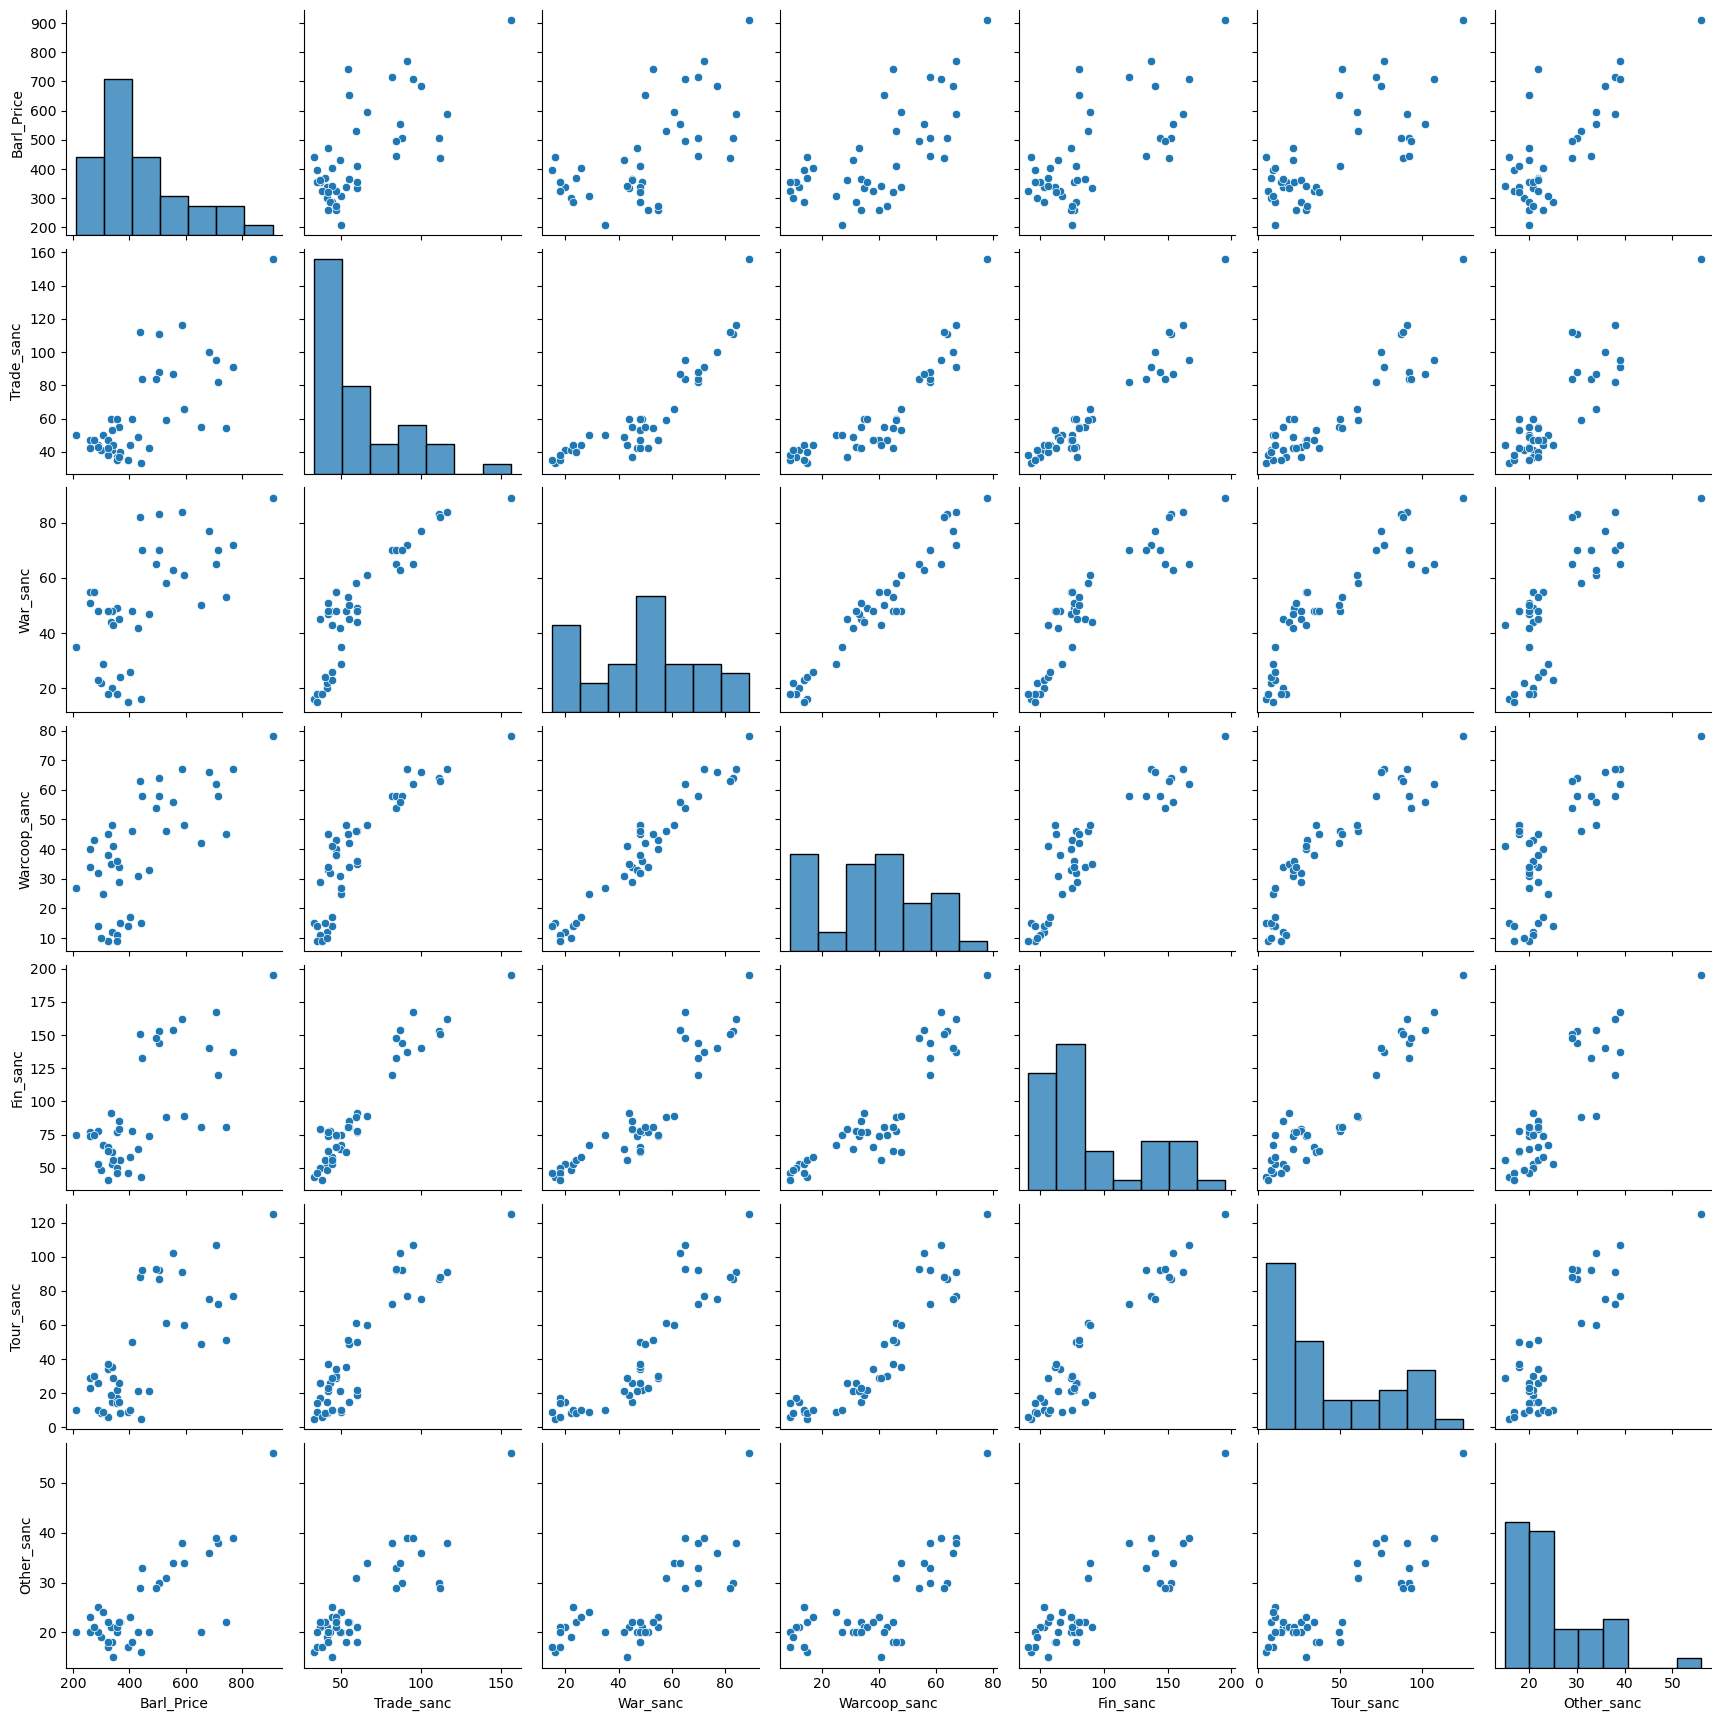

In [5]:
sns.pairplot(df1)

In [42]:
sns.pairplot(df2)

In [7]:
sns.pairplot(df3)

In [8]:
sns.pairplot(df4)

In [9]:
sns.pairplot(df5)

In [10]:
sns.pairplot(df6)

In [11]:
sns.pairplot(df7)

In [12]:
sns.pairplot(df8)

In [13]:
sns.pairplot(df9)

In [14]:
sns.pairplot(df10)

In [15]:
sns.pairplot(df11)

In [16]:
sns.pairplot(df12)

После первичной оценки взаимосвязей исследуемых признаков, можно сделать краткие выводы о виде взаимосвязи исследуемой переменной с каждым из регрессоров по отдельности. 

В каждой из моделей рассматриваесые признаки отличны от нормального распределения. Большая часть признаков распределены в соответствии с распределением Хи-квадрат или Лог-нормальным распределением. 

Стоит отметить, что несмотря на то, что большинство регрессоров имеют линейную взаимосвязь с объясняемыми переменными, некоторые регрессоры имеют нелинейные связи (как, например, взаимосвязть ВВП России и финансовыми санкциями). Поэтому далее будут проверяться различные виды регрессии.

#### Построение моделей - постоение моделей множественной регресии без фиктивных переменных.

Сначала рассмотрим линейные модели множественной регрессии и их основные статистики. Сразу же стоит отобрать значимые призныки в модели.

##### Рассмотрим первую модель.

In [17]:
res1 = smf.ols("Barl_Price ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df1).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Barl_Price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     13.73
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           4.75e-08
Time:                        13:23:50   Log-Likelihood:                -253.87
No. Observations:                  43   AIC:                             521.7
Df Residuals:                      36   BIC:                             534.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      172.0160     72.470      2.374      0.023      25.040     318.992
Trade_sanc       0.4161      1.962      0.212      0.833      -3.563       4.395
War_sanc        -5.7107      3.424     -1.668      0.104     -12.655       1.234
Warcoop_sanc     6.9681      3.949      1.765      0.086      -1.040      14.976
Fin_sanc        -1.9130      1.675     -1.142      0.261      -5.309       1.483
Tour_sanc        2.3115      1.609      1.436      0.160      -0.952       5.575
Other_sanc      12.8558      3.982      3.228      0.003       4.779      20.932
==============================================================================
Omnibus:                       13.281   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.814
Skew:                           1.079   Prob(JB):                     0.000607
Kurtosis:                       4.900   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель. 

In [18]:
res1 = smf.ols("Barl_Price ~ War_sanc + Warcoop_sanc + Other_sanc", data=df1).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Barl_Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     27.19
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.17e-09
Time:                        13:23:51   Log-Likelihood:                -255.20
No. Observations:                  43   AIC:                             518.4
Df Residuals:                      39   BIC:                             525.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      112.7724     50.686      2.225      0.032      10.251     215.294
War_sanc        -7.4952      3.141     -2.387      0.022     -13.848      -1.143
Warcoop_sanc     9.4695      3.412      2.775      0.008       2.568      16.371
Other_sanc      12.9268      2.681      4.822      0.000       7.504      18.350
==============================================================================
Omnibus:                       17.352   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.308
Skew:                           1.228   Prob(JB):                     5.27e-06
Kurtosis:                       5.746   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из данной модели получается, что на цену на пшеницу влиют только пакеты санкций, направленные на противодействие военному сотрудничеству и другие санкции. Объяснением такого результата может быть то, что пшеница является важным товаром, от которого зависит здоровье людей. Поэтому санкции в отношении пшеницы зачастую не применяются. 

Военные же санкции вводятся в отношении стран тогда, когда имеет место вооруженные конфликты, которое только увеличивают необходимость стран поддерживать продовольственную безопасность на высоком уровне, что приводит к росту цен на такую продукцию.

##### Рассмотрим вторую модель.

In [19]:
res2 = smf.ols("EU_gas_price ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df2).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EU_gas_price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     12.29
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.75e-07
Time:                        13:23:51   Log-Likelihood:                -258.73
No. Observations:                  43   AIC:                             531.5
Df Residuals:                      36   BIC:                             543.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -113.8965     81.154     -1.403      0.169    -278.485      50.692
Trade_sanc       5.7622      2.197      2.623      0.013       1.306      10.218
War_sanc        -6.2977      3.834     -1.642      0.109     -14.074       1.479
Warcoop_sanc     8.2144      4.422      1.858      0.071      -0.753      17.182
Fin_sanc        -6.1292      1.875     -3.268      0.002      -9.933      -2.326
Tour_sanc        1.4792      1.802      0.821      0.417      -2.176       5.134
Other_sanc      16.4979      4.460      3.699      0.001       7.453      25.542
==============================================================================
Omnibus:                       18.804   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.109
Skew:                           1.325   Prob(JB):                     1.30e-06
Kurtosis:                       5.848   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель. 

In [20]:
res2 = smf.ols("EU_gas_price ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Other_sanc", data=df2).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           EU_gas_price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     14.74
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           5.82e-08
Time:                        13:23:51   Log-Likelihood:                -259.13
No. Observations:                  43   AIC:                             530.3
Df Residuals:                      37   BIC:                             540.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -157.3824     61.204     -2.571      0.014    -281.393     -33.372
Trade_sanc       5.5568      2.173      2.557      0.015       1.154       9.960
War_sanc        -7.1611      3.671     -1.951      0.059     -14.599       0.277
Warcoop_sanc     9.9257      3.882      2.557      0.015       2.060      17.792
Fin_sanc        -5.2735      1.552     -3.398      0.002      -8.418      -2.129
Other_sanc      17.2247      4.351      3.958      0.000       8.408      26.042
==============================================================================
Omnibus:                       18.601   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.189
Skew:                           1.329   Prob(JB):                     2.06e-06
Kurtosis:                       5.748   Cond. No.                         519.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Таким образом, при удалении туристических санкций, данная модель становится значимой. Даже несмотря на то военные сакции немного превышают p-значение. Таким образом, цены на газ в ЕС зависят почти от всех санкций. 

##### Рассмотрим третью модель.

In [21]:
res3 = smf.ols("US_gas_price ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df3).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           US_gas_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     10.27
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.29e-06
Time:                        13:23:51   Log-Likelihood:                -216.44
No. Observations:                  43   AIC:                             446.9
Df Residuals:                      36   BIC:                             459.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      156.8411     30.350      5.168      0.000      95.289     218.393
Trade_sanc       0.8511      0.822      1.036      0.307      -0.815       2.517
War_sanc        -1.5757      1.434     -1.099      0.279      -4.484       1.333
Warcoop_sanc     4.8917      1.654      2.958      0.005       1.538       8.245
Fin_sanc        -3.0844      0.701     -4.398      0.000      -4.507      -1.662
Tour_sanc        2.0797      0.674      3.086      0.004       0.713       3.447
Other_sanc      -0.9607      1.668     -0.576      0.568      -4.343       2.422
==============================================================================
Omnibus:                        8.152   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.038
Skew:                           0.864   Prob(JB):                       0.0296
Kurtosis:                       3.971   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель. 

In [22]:
res3 = smf.ols("US_gas_price ~ + Warcoop_sanc + Fin_sanc + Tour_sanc ", data=df3).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           US_gas_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     20.04
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           5.07e-08
Time:                        13:23:51   Log-Likelihood:                -217.83
No. Observations:                  43   AIC:                             443.7
Df Residuals:                      39   BIC:                             450.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      144.3804     23.612      6.115      0.000      96.620     192.141
Warcoop_sanc     3.5289      0.801      4.407      0.000       1.909       5.148
Fin_sanc        -2.9473      0.478     -6.167      0.000      -3.914      -1.981
Tour_sanc        2.1925      0.629      3.487      0.001       0.921       3.464
==============================================================================
Omnibus:                        8.373   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.283
Skew:                           0.903   Prob(JB):                       0.0262
Kurtosis:                       3.895   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Цены на газ в США зависят от санкции в отношении военного сотрудничества (так как газ является одним из видов топлива, которое используется в военной сфере), финансовых санкций и туристических санкций. Туристические санкции в данной модели, скорее всего, влияют на то, что такие санкции в США вводятся путем ограничения путешествий основным управляющим компаний, которые вносят большой вклад в ВВП стран, в отношении которых вводятся санкции. 

##### Рассмотрим четвертую модель.

In [23]:
res4 = smf.ols("Oil_price ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df4).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Oil_price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     14.57
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.33e-08
Time:                        13:23:51   Log-Likelihood:                -180.97
No. Observations:                  43   AIC:                             375.9
Df Residuals:                      36   BIC:                             388.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8009     13.303      0.286      0.777     -23.179      30.781
Trade_sanc       0.0741      0.360      0.206      0.838      -0.656       0.804
War_sanc        -1.0406      0.629     -1.656      0.107      -2.315       0.234
Warcoop_sanc     1.8372      0.725      2.535      0.016       0.367       3.307
Fin_sanc        -0.6264      0.307     -2.038      0.049      -1.250      -0.003
Tour_sanc        0.5599      0.295      1.895      0.066      -0.039       1.159
Other_sanc       1.9168      0.731      2.622      0.013       0.434       3.399
==============================================================================
Omnibus:                        1.893   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.218
Skew:                           0.404   Prob(JB):                        0.544
Kurtosis:                       3.162   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель. 

In [24]:
res4 = smf.ols("Oil_price ~ Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df4).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Oil_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     20.70
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           4.02e-09
Time:                        13:23:51   Log-Likelihood:                -182.59
No. Observations:                  43   AIC:                             375.2
Df Residuals:                      38   BIC:                             384.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3173     13.120      0.024      0.981     -26.243      26.878
Warcoop_sanc     0.8230      0.363      2.269      0.029       0.089       1.557
Fin_sanc        -0.7469      0.237     -3.150      0.003      -1.227      -0.267
Tour_sanc        0.6857      0.285      2.402      0.021       0.108       1.264
Other_sanc       2.0108      0.674      2.983      0.005       0.646       3.375
==============================================================================
Omnibus:                        2.176   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.062
Skew:                           0.491   Prob(JB):                        0.357
Kurtosis:                       2.570   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Результаты модели показывают, что модель можно описать в том числе и без помощи Интерсепта. При этом, военные и торговые санкции на цены на нефть не влияют. Это обуславливается тем, что очень многие стран очень сильно зависят от этого ресурса, в том числе и в военной сфере. 

##### Рассмотрим пятую модель.

In [25]:
res5 = smf.ols("IranGDP ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df5).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IranGDP   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           7.35e-10
Time:                        13:23:51   Log-Likelihood:                -283.85
No. Observations:                  43   AIC:                             581.7
Df Residuals:                      36   BIC:                             594.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -247.2914    145.530     -1.699      0.098    -542.440      47.857
Trade_sanc      -1.6904      3.940     -0.429      0.670      -9.681       6.300
War_sanc       -18.2750      6.876     -2.658      0.012     -32.220      -4.329
Warcoop_sanc    10.7691      7.929      1.358      0.183      -5.312      26.851
Fin_sanc         3.3583      3.363      0.999      0.325      -3.462      10.179
Tour_sanc        3.8289      3.232      1.185      0.244      -2.725      10.383
Other_sanc      29.1591      7.997      3.646      0.001      12.940      45.378
==============================================================================
Omnibus:                        3.507   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.608
Skew:                           0.286   Prob(JB):                        0.271
Kurtosis:                       4.062   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [26]:
res5 = smf.ols("IranGDP ~ War_sanc + Tour_sanc + Other_sanc", data=df5).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IranGDP   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     38.06
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.15e-11
Time:                        13:23:51   Log-Likelihood:                -285.21
No. Observations:                  43   AIC:                             578.4
Df Residuals:                      39   BIC:                             585.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.1471    139.657     -1.462      0.152    -486.630      78.336
War_sanc      -9.4113      3.111     -3.025      0.004     -15.705      -3.118
Tour_sanc      7.0546      2.286      3.086      0.004       2.431      11.678
Other_sanc    29.3199      6.498      4.512      0.000      16.177      42.463
==============================================================================
Omnibus:                        5.456   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.161
Skew:                           0.646   Prob(JB):                        0.125
Kurtosis:                       3.808   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Иран уже давно находится под санкциями стран мира. За 42 года страна научилась функционировать в сложных экономических условиях. В стране сейчас работает собственная финансовая система, торговля ведется с помощью серых схем и т.д. Поэтому на ВВП Ирана влияют лишь некоторые санкции. 

##### Рассмотрим шестую модель.

In [27]:
res6 = smf.ols("SyrGDP ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df6).fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SyrGDP   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     9.638
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.50e-06
Time:                        13:23:51   Log-Likelihood:                -216.39
No. Observations:                  43   AIC:                             446.8
Df Residuals:                      36   BIC:                             459.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       96.6800     30.312      3.190      0.003      35.205     158.155
Trade_sanc      -1.5722      0.821     -1.916      0.063      -3.236       0.092
War_sanc         1.7322      1.432      1.210      0.234      -1.172       4.637
Warcoop_sanc     1.8373      1.652      1.112      0.273      -1.512       5.187
Fin_sanc        -2.9124      0.700     -4.158      0.000      -4.333      -1.492
Tour_sanc        2.2656      0.673      3.366      0.002       0.900       3.631
Other_sanc       2.9653      1.666      1.780      0.083      -0.413       6.343
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.602
Skew:                           0.413   Prob(JB):                        0.449
Kurtosis:                       3.461   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, некоторые признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [28]:
res6 = smf.ols("SyrGDP ~ Trade_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df6).fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SyrGDP   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     11.13
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.36e-06
Time:                        13:23:51   Log-Likelihood:                -217.24
No. Observations:                  43   AIC:                             446.5
Df Residuals:                      37   BIC:                             457.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      101.3948     30.247      3.352      0.002      40.108     162.682
Trade_sanc      -1.6147      0.825     -1.957      0.058      -3.286       0.057
Warcoop_sanc     3.5603      0.841      4.234      0.000       1.857       5.264
Fin_sanc        -2.6331      0.665     -3.957      0.000      -3.981      -1.285
Tour_sanc        2.0422      0.651      3.136      0.003       0.723       3.362
Other_sanc       2.9469      1.676      1.758      0.087      -0.449       6.343
==============================================================================
Omnibus:                        3.480   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.310
Skew:                           0.478   Prob(JB):                        0.315
Kurtosis:                       3.614   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Если сравнивать Сирию и Иран, то Сирия на данный момент не обладает теми характеристиками и системами, которые сейчас есть у Ирана. Поэтому на ВВП Сирии будут влиять почти все виды санкций.

##### Рассмотрим седьмую модель.

In [29]:
res7 = smf.ols("VenGDP ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df7).fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VenGDP   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     7.620
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.52e-05
Time:                        13:23:51   Log-Likelihood:                -235.01
No. Observations:                  43   AIC:                             484.0
Df Residuals:                      36   BIC:                             496.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.0699     46.743      0.130      0.897     -88.729     100.869
Trade_sanc      -1.1337      1.265     -0.896      0.376      -3.700       1.433
War_sanc         2.6390      2.209      1.195      0.240      -1.840       7.118
Warcoop_sanc     3.1228      2.547      1.226      0.228      -2.042       8.288
Fin_sanc        -3.4756      1.080     -3.218      0.003      -5.666      -1.285
Tour_sanc        1.1494      1.038      1.107      0.276      -0.956       3.254
Other_sanc       7.8800      2.569      3.068      0.004       2.671      13.089
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.912
Skew:                           0.306   Prob(JB):                        0.634
Kurtosis:                       3.368   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [30]:
res7 = smf.ols("VenGDP ~ Warcoop_sanc + Fin_sanc + Other_sanc", data=df7).fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VenGDP   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     14.12
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.21e-06
Time:                        13:23:51   Log-Likelihood:                -236.82
No. Observations:                  43   AIC:                             481.6
Df Residuals:                      39   BIC:                             488.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.9371     31.812     -0.281      0.780     -73.282      55.408
Warcoop_sanc     6.0448      1.113      5.431      0.000       3.793       8.296
Fin_sanc        -3.1958      0.684     -4.669      0.000      -4.580      -1.811
Other_sanc       7.2464      2.309      3.139      0.003       2.577      11.916
==============================================================================
Omnibus:                        1.839   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                0.951
Skew:                          -0.022   Prob(JB):                        0.621
Kurtosis:                       3.727   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Венесуэла сегодня представляет довольно сложную страну. Развитие теневого сектора, рост насильственных преступлений не позволяют стране развиваться в социально-экономическом плане. А санкции, которые имеют под собой военное сотрудничество и финансы не позволяют стране победить преступность и наполнить бюджет.

##### Рассмотрим восьмую модель.

In [31]:
res8 = smf.ols("RussiaGDP ~ Trade_sanc + War_sanc + Warcoop_sanc + Fin_sanc + Tour_sanc + Other_sanc", data=df8).fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RussiaGDP   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     16.25
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           6.00e-09
Time:                        13:23:51   Log-Likelihood:                -308.98
No. Observations:                  43   AIC:                             632.0
Df Residuals:                      36   BIC:                             644.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      427.9393    261.077      1.639      0.110    -101.549     957.428
Trade_sanc       7.8543      7.068      1.111      0.274      -6.480      22.189
War_sanc       -23.7056     12.336     -1.922      0.063     -48.723       1.312
Warcoop_sanc    10.3447     14.225      0.727      0.472     -18.505      39.194
Fin_sanc        -8.9996      6.033     -1.492      0.144     -21.235       3.236
Tour_sanc       18.1891      5.797      3.137      0.003       6.431      29.947
Other_sanc      36.1341     14.347      2.519      0.016       7.038      65.230
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.684
Skew:                           0.284   Prob(JB):                        0.710
Kurtosis:                       3.242   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [32]:
res8 = smf.ols("RussiaGDP ~  War_sanc + Tour_sanc + Other_sanc", data=df8).fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RussiaGDP   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     30.84
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.19e-10
Time:                        13:23:51   Log-Likelihood:                -311.02
No. Observations:                  43   AIC:                             630.0
Df Residuals:                      39   BIC:                             637.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    345.1458    254.539      1.356      0.183    -169.708     859.999
War_sanc     -17.9035      5.671     -3.157      0.003     -29.374      -6.433
Tour_sanc     16.1032      4.166      3.865      0.000       7.676      24.531
Other_sanc    34.8331     11.843      2.941      0.005      10.878      58.788
==============================================================================
Omnibus:                        2.066   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.557
Skew:                           0.466   Prob(JB):                        0.459
Kurtosis:                       3.002   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Россия же в отличии от других стран представляет собой уникальную модель страны. Торговые санкци не могут нанести существенного вреда экономике, посколько Россия является важным игроком на мировом рынке, военное сотрудничество налажено со странами, которые не являются члена недружественных блоков, а финансовая система довольно быстро адаптируется к меняющимся условиям (в том числе, используя и серые схемы оплаты). В значительной степени на ВВП России вляют военные санкции, которые направлены на изоляцию страны от высокотехнологичных элементов (например, процессоров), и туристические санкции, которые с одной стороны не позволяют части граждан спокойно путешествовать в некоторые страны, а с другой стороны открывают новые туристические направления. 

##### Рассмотрим девятую модель.

In [33]:
res9 = smf.ols("IranGDP ~ Oil_price + EU_gas_price + US_gas_price + Barl_Price", data=df9).fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IranGDP   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     14.25
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.40e-07
Time:                        13:23:51   Log-Likelihood:                -294.92
No. Observations:                  43   AIC:                             599.8
Df Residuals:                      38   BIC:                             608.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -48.7263    174.310     -0.280      0.781    -401.599     304.146
Oil_price       -1.3853      2.917     -0.475      0.638      -7.291       4.520
EU_gas_price     1.3124      0.366      3.590      0.001       0.572       2.053
US_gas_price    -0.9806      0.822     -1.193      0.240      -2.644       0.683
Barl_Price       0.8191      0.596      1.373      0.178      -0.388       2.026
==============================================================================
Omnibus:                       22.970   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.340
Skew:                           1.498   Prob(JB):                     1.74e-09
Kurtosis:                       6.679   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [34]:
res9 = smf.ols("IranGDP ~ EU_gas_price", data=df9).fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IranGDP   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     48.56
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.83e-08
Time:                        13:23:51   Log-Likelihood:                -297.82
No. Observations:                  43   AIC:                             599.6
Df Residuals:                      41   BIC:                             603.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       99.5895     55.920      1.781      0.082     -13.343     212.522
EU_gas_price     1.5470      0.222      6.968      0.000       1.099       1.995
==============================================================================
Omnibus:                       33.758   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.521
Skew:                           2.081   Prob(JB):                     7.31e-19
Kurtosis:                       8.413   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ВВП Ирана уже давно не зависит от цен на нефть эталонной марки Brent. Также страна не зависит и от цен на газ в ЕС, а пшеница в стране производится самостоятельно. Основным фактором, который в будущем будет влиять на ВВП Ирана будет участие в проекте создания газового хаба в Турции, что также может привести к развитию страны.

##### Рассмотрим десятую модель.

In [35]:
res10 = smf.ols("SyrGDP ~ Oil_price + EU_gas_price + US_gas_price + Barl_Price", data=df10).fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SyrGDP   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     9.562
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.89e-05
Time:                        13:23:51   Log-Likelihood:                -222.01
No. Observations:                  43   AIC:                             454.0
Df Residuals:                      38   BIC:                             462.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -46.2820     31.986     -1.447      0.156    -111.034      18.470
Oil_price       -0.6477      0.535     -1.210      0.234      -1.731       0.436
EU_gas_price    -0.0795      0.067     -1.186      0.243      -0.215       0.056
US_gas_price     0.8069      0.151      5.351      0.000       0.502       1.112
Barl_Price       0.1496      0.109      1.367      0.180      -0.072       0.371
==============================================================================
Omnibus:                       38.710   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.533
Skew:                           2.298   Prob(JB):                     1.11e-26
Kurtosis:                       9.752   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [36]:
res10 = smf.ols("SyrGDP ~ US_gas_price", data=df10).fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SyrGDP   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     36.38
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.90e-07
Time:                        13:23:51   Log-Likelihood:                -223.32
No. Observations:                  43   AIC:                             450.6
Df Residuals:                      41   BIC:                             454.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.9415     14.095     -0.634      0.529     -37.406      19.523
US_gas_price     0.6715      0.111      6.032      0.000       0.447       0.896
==============================================================================
Omnibus:                       31.306   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.199
Skew:                           1.896   Prob(JB):                     2.84e-17
Kurtosis:                       8.306   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Сирия сегодня сталкивается со многими вызовами со стороны, которые участвуют в военном конфликте на ее территории. Так в СМИ нередко появляется информация, которое свидетельствует о том, что из страны вывозят полезные ископаемые, в то время как страна находится в полуразрушенном состоянии. Такая деятельность хоть и является разрушительной, но и все равно может принести в ВВП некоторые потоки денежных средств.

##### Рассмотрим одиннадцатую модель.

In [37]:
res11 = smf.ols("VenGDP ~ Oil_price + EU_gas_price + US_gas_price + Barl_Price", data=df11).fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VenGDP   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.35e-09
Time:                        13:23:51   Log-Likelihood:                -228.62
No. Observations:                  43   AIC:                             467.2
Df Residuals:                      38   BIC:                             476.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.7640     37.301      0.369      0.714     -61.748      89.276
Oil_price        2.6639      0.624      4.268      0.000       1.400       3.928
EU_gas_price    -0.1365      0.078     -1.745      0.089      -0.295       0.022
US_gas_price     0.2265      0.176      1.288      0.205      -0.129       0.582
Barl_Price      -0.0312      0.128     -0.244      0.808      -0.290       0.227
==============================================================================
Omnibus:                        3.207   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.494
Skew:                           0.149   Prob(JB):                        0.287
Kurtosis:                       4.142   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видно из результатов, многие признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [38]:
res11 = smf.ols("VenGDP ~ Oil_price + EU_gas_price + US_gas_price", data=df11).fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VenGDP   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     26.66
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.51e-09
Time:                        13:23:51   Log-Likelihood:                -228.65
No. Observations:                  43   AIC:                             465.3
Df Residuals:                      39   BIC:                             472.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7023     17.136      0.333      0.741     -28.959      40.363
Oil_price        2.5423      0.371      6.847      0.000       1.791       3.293
EU_gas_price    -0.1475      0.063     -2.328      0.025      -0.276      -0.019
US_gas_price     0.2426      0.161      1.506      0.140      -0.083       0.568
==============================================================================
Omnibus:                        3.424   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.867
Skew:                           0.118   Prob(JB):                        0.238
Kurtosis:                       4.243   Cond. No.                         603.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Влияние неучтенных факторов в модели очень сильно влияет на другие показатели. В то же время, ВВП Венесуэлы зависит почти от всех цен на рассматриваемые товары. Экономики США и ЕС играют важную роль в развитии страны, которая не только является довольно проблематичной страной, но и обладает значительными запасами минеральных ресуров.

##### Рассмотрим двенадцатую модель.

In [39]:
res12 = smf.ols("RussiaGDP ~ Oil_price + EU_gas_price + US_gas_price + Barl_Price", data=df12).fit()
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RussiaGDP   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     56.04
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.99e-15
Time:                        13:23:51   Log-Likelihood:                -295.63
No. Observations:                  43   AIC:                             601.3
Df Residuals:                      38   BIC:                             610.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      340.8626    177.211      1.923      0.062     -17.883     699.608
Oil_price       19.6493      2.966      6.626      0.000      13.646      25.653
EU_gas_price     0.2173      0.372      0.585      0.562      -0.535       0.970
US_gas_price    -2.8522      0.835     -3.414      0.002      -4.543      -1.161
Barl_Price       0.2101      0.606      0.347      0.731      -1.017       1.438
==============================================================================
Omnibus:                        1.614   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.381
Skew:                          -0.279   Prob(JB):                        0.501
Kurtosis:                       2.322   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видно из результатов, некоторые признаки модели незначимы. Продолжим оптимизировать модель до тех пор, пока признаки не станут значимыми. В таком результате мы получим следующую модель.

In [40]:
res12 = smf.ols("RussiaGDP ~ Oil_price + US_gas_price", data=df12).fit()
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RussiaGDP   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.87e-17
Time:                        13:23:51   Log-Likelihood:                -296.20
No. Observations:                  43   AIC:                             598.4
Df Residuals:                      40   BIC:                             603.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      386.2711     80.880      4.776      0.000     222.806     549.736
Oil_price       21.3698      1.499     14.257      0.000      18.340      24.399
US_gas_price    -2.7682      0.739     -3.747      0.001      -4.261      -1.275
==============================================================================
Omnibus:                        1.823   Durbin-Watson:                   0.596
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.357
Skew:                          -0.217   Prob(JB):                        0.507
Kurtosis:                       2.245   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ВВП России очень сильно зависит от мировых цен на нефть. В то же время, ВВП России зависит и от цен на газ в США. Это можно объяснить следующим образом. Газ из США является альтернативой газу России в сфере поставок в Европу и другие страны. Таким образом, сейчас ВВП России и получает какие-либо значительные поступления в бюджет от продажи газа в ЕС, но санкции могут ограничивать такую деятельность.

Таким образом, мы рассмотрели 12 моделей влияния санкций на ВВП выбранных стран, а также на цены на биржевые товары. В целом, множественная линейная регрессия достаточно хорошо описывает данные процессы. Однако специфика данного анализа заключается в том, что санкции являются долгосрочными факторами. 

Так, например, критерий Дарбина-Уотсона часто говорит об автокорреляции первого порядка элементов исследуемой последовательности, а именно отрицательной автокорреляции. Далее стоит провести с моделями ряд параметрических и непараметрических тестов, а также посмотерть на сложные эконометрические модели для данного исследования. 

Хотя линейная регрессия и дает в целом хорошие модели, стоит построить нелинейные модели для некоторых из них. Возможно, это даст нам более подходящие модели. 